In [68]:
import pandas as pd
import networkx as nx
from networkx.algorithms.approximation import min_weighted_vertex_cover
import matplotlib.pyplot as plt

In [51]:
with open('data/neighbor_cities_in_Turkey.txt', 'r') as f:
    lines = f.read().splitlines() 

In [53]:
G = nx.from_dict_of_lists({line.split(',')[0]: line.split(',')[1:] for line in lines})

In [131]:
len(set(G.nodes))

81

In [130]:
G.nodes

NodeView(('Adana', 'Adiyaman', 'Afyon', 'Agri', 'Amasya', 'Ankara', 'Antalya', 'Artvin', 'Aydin', 'Balikesir', 'Bilecik', 'Bingol', 'Bitlis', 'Bolu', 'Burdur', 'Bursa', 'Canakkale', 'Cankiri', 'Corum', 'Denizli', 'Diyarbakir', 'Edirne', 'Elazig', 'Erzincan', 'Erzurum', 'Eskisehir', 'Gaziantep', 'Giresun', 'Gumushane', 'Hakkari', 'Hatay', 'Isparta', 'Mersin', 'Istanbul', 'Izmir', 'Kars', 'Kastamonu', 'Kayseri', 'Kirklareli', 'Kirsehir', 'Kocaeli', 'Konya', 'Kutahya', 'Malatya', 'Manisa', 'Kahramanmaras', 'Mardin', 'Mugla', 'Mus', 'Nevsehir', 'Nigde', 'Ordu', 'Rize', 'Sakarya', 'Samsun', 'Siirt', 'Sinop', 'Sivas', 'Tekirdag', 'Tokat', 'Trabzon', 'Tunceli', 'Sanliurfa', 'Usak', 'Van', 'Yozgat', 'Zonguldak', 'Aksaray', 'Bayburt', 'Karaman', 'Kirikkale', 'Batman', 'Sirnak', 'Bartin', 'Ardahan', 'Igdir', 'Yalova', 'Karabuk', 'Kilis', 'Osmaniye', 'Duzce'))

In [250]:
#source: "https://simplemaps.com/data/tr-cities"
coordinates_and_population = pd.read_csv("data/coordinates.csv")[["city", "lng", "lat", 'population']]

In [252]:
coordinates_and_population.city = (coordinates_and_population.city
                                   .str.replace('ş','s')
                                   .str.replace('ğ','g')
                                   .str.replace('ı','i')
                                   .str.replace('ç','c')
                                   .str.replace('ü','u')
                                   .str.replace('Ş','S')
                                   .str.replace('ö','o')
                                   .str.replace('Ç','C')
                                   .str.replace('Ü','U')
                                   .str.replace('İ','I')
                                   .str.replace('Ö','O')
                                   .str.replace('Afyonkarahisar','Afyon'))

In [253]:
coordinates_and_population = coordinates_and_population.set_index('city')
coordinates_and_population = coordinates_and_population.loc[~coordinates_and_population.index.duplicated(keep='first')]
coordinates_and_population = coordinates_and_population.reindex(G.nodes)

In [254]:
len(coordinates_and_population)

81

In [255]:
pos = coordinates_and_population[["lng", "lat"]].T.to_dict(orient='list')

In [256]:
#biggest_30_cities = coordinates_and_population.population.sort_values(ascending=False).head(30).index

In [265]:
#source: https://www.haberturk.com/giris-cikis-yasaklanan-iller-hangisidir-30-buyuksehir-listesi-2020-2635405
restricted_cities = ["Adana", "Ankara", "Antalya", "Aydın", "Balıkesir", "Bursa", "Denizli", "Diyarbakır", 
 "Erzurum", "Eskişehir", "Gaziantep", "Hatay", "İstanbul", "İzmir", "Kahramanmaraş", 
 "Kayseri", "Kocaeli", "Konya", "Malatya", "Manisa", "Mardin", "Mersin", "Muğla", 
 "Ordu", "Sakarya", "Samsun", "Şanlıurfa", "Tekirdağ", "Trabzon", "Van", "Zonguldak"]

In [269]:
restricted_cities = (pd.Series(restricted_cities)
 .str.replace('ş','s')
 .str.replace('ğ','g')
 .str.replace('ı','i')
 .str.replace('ç','c')
 .str.replace('ü','u')
 .str.replace('Ş','S')
 .str.replace('ö','o')
 .str.replace('Ç','C')
 .str.replace('Ü','U')
 .str.replace('İ','I')
 .str.replace('Ö','O')
 .str.replace('Afyonkarahisar','Afyon')).values

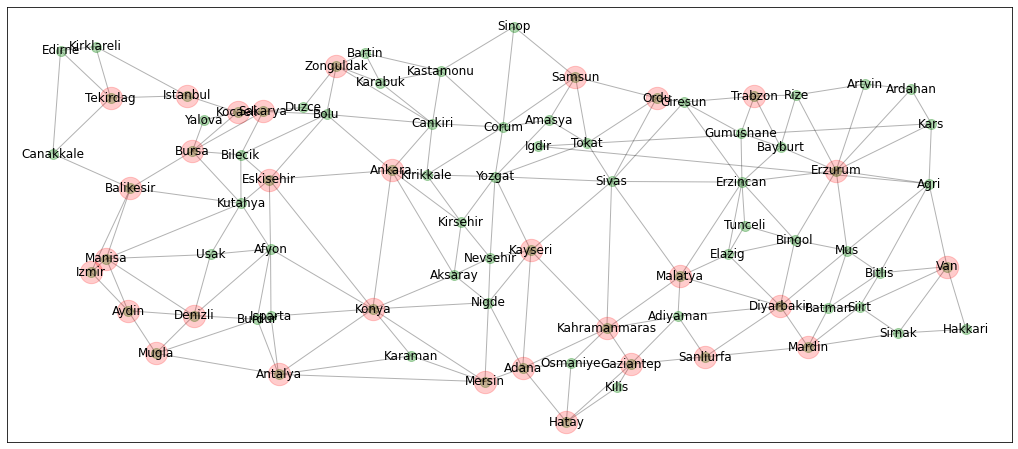

In [270]:
plt.figure(figsize=(18,8)) 
nodes = nx.draw_networkx_nodes(G, pos=pos, alpha=0.3, node_size=100, node_color='green')
big_cities = nx.draw_networkx_nodes(G, nodelist=restricted_cities, pos=pos, alpha=0.2, node_size=500, node_color='red')
labels = nx.draw_networkx_labels(G, pos=pos)
edges = nx.draw_networkx_edges(G, pos=pos, alpha=0.3)

In [58]:
# 2-approx. algorithm for min. vertex cover
len(min_weighted_vertex_cover(G))

74

In [59]:
# maximum matching number is a lower bound for the min. vertex cover number
len(nx.max_weight_matching(G))

40

In [67]:
# |V| = a minimal vertex cover + a maximal independent set
len(G.nodes) - len(nx.algorithms.mis.maximal_independent_set(G))

59

In [274]:
vertex_cover = set(G.nodes).difference(nx.algorithms.mis.maximal_independent_set(G))

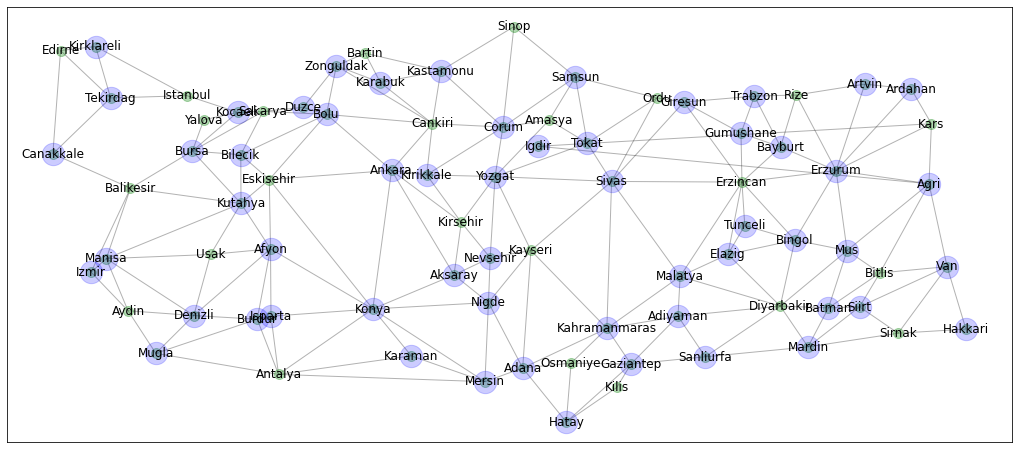

In [276]:
plt.figure(figsize=(18,8)) 
nodes = nx.draw_networkx_nodes(G, pos=pos, alpha=0.3, node_size=100, node_color='green')
vc = nx.draw_networkx_nodes(G, nodelist=vertex_cover, pos=pos, alpha=0.2, node_size=500, node_color='blue')
labels = nx.draw_networkx_labels(G, pos=pos)
edges = nx.draw_networkx_edges(G, pos=pos, alpha=0.3)